# Numerische Lösung von Differentialgleichungen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Windwiderstand
$$\frac{dv(t)}{dt}=-\gamma v(t)^2$$
Die Lösung lautet
$$v(t)=\frac{1}{\gamma\cdot t+t}$$


In [ ]:
def f(t,v):
    gamma = 0.1
    dvdt = -gamma*v**2
    return dvdt

In [ ]:
'''
Wir benutzen 2 Methoden um die Differentialgleichung für die Abnahme der Geschwindigkeit 
durch den Windwiderstand zu berechnen. Einmal die Euler-Vorwärts Methode und zum anderen
die scipy Biblitheksroutine solve_ivp
'''
#
# Euler Vorwärts
t0 = 0.
t_max = 10.
n = 101
dt = (t_max-t0)/(n-1)   # Das einzelne Intervall ist dt=0.1 lang für n=101 Punktem und t_max=10.
#
v1 = np.zeros(n)
v1[0] = 1.
# zum neuen Zeitpunkt t+dt. Euler Vorwärtsintegration
for i in np.arange(1,n):
    v1[i] = v1[i-1]+f(1.,v1[i-1])*dt
#
# Scipy Bibliotheksroutine solve_ivp
vsc0 = [1.0]
t_eval = np.linspace(0,(n-1)*dt,n)
t_span = [t0,t_max]
sol1 = solve_ivp(f,t_span,vsc0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
#
sol2 = solve_ivp(f,t_span,vsc0,t_eval=t_eval, method = 'RK23', rtol = 1.e-8, atol = 1.e-10)

In [ ]:
%matplotlib notebook
fig,ax = plt.subplots()
#
t = t_eval
v2 = 1./(0.1*t+1.)
v3 = sol1.y[0]
v4 = sol2.y[0]
#
ax.set_xlabel('t')
ax.set_ylabel('v')
#ax.plot(t, v2-v1, label = 'Euler')
#ax.plot(t, v2, label = 'exact')
#ax.plot(t,f(t_span,v2), label = 'Ableitung von v')
ax.plot(t, np.abs(v2-v3), label = 'exakt - RK45')
ax.plot(t, np.abs(v2-v4), label = 'exakt - RK23')
ax.legend()

## Der harmonische Oszillator
### Trägheitskraft + Federkraft = äußere Kraft
$$ m\cdot a(t) + k\cdot x(t) = f(t)$$
#### Umschreiben in System von Differentialgleichungen 1. Ordnung
$$\dot{x}(t)=v(t)$$
$$\dot{v}(t)=-x(t)+f(t)$$

### van der Pol Oszillator
$$\dot{x}(t)=v(t)$$
$$\dot{v}(t)=-x(t)+\mu\cdot(1-x^2(t))\cdot v(t)$$


In [ ]:
n = 1001
x = np.zeros(n)
v = np.zeros(n)
#
x[0] = 1.    # Anfangsbedingung für x, Anfangsauslenkung
v[0] = 0.    # Anfangsbedingung für v, Anfangsgeschwindigkeit
#
t0 = 0.
t_max = 100.

dt = (t_max-t0)/(n-1)   
# zuerst f(t)=0 und Euler vorwärts
for i in np.arange(1,n):
    x[i] = x[i-1] + v[i-1]*dt
    v[i] = v[i-1] - x[i]*dt # -0.1*v[i-1]*dt

In [ ]:
def g(t,y):
    mu = 0.1
    x , v = y
    dxdt = v
    dvdt = -x + mu*(1.-x**2)*v
    return [dxdt,dvdt]

In [ ]:
t_eval = np.linspace(0.,100.,n)
y_0 = np.array([1.,0.])
t_span = np.array([0.,100.])
sol = solve_ivp(g,t_span,y_0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
xivp = sol.y[0]
vivp = sol.y[1]

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(2,2)
#fig.tight_layout()
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=-0.4,
                    hspace=1.0)
#
aspect0 = 100/2
aspect1 = 1.
#
ax[0,0].set_aspect(aspect0)
ax[0,0].set_xlabel('Zeit')
ax[0,0].set_ylabel('Amplitude')
ax[0,0].plot(x[:101], label = 'Auslenkung')
ax[0,0].plot(v[:101], label = 'Geschwindigkeit')
ax[0,0].plot(xivp[:101], label = 'Auslenkung aus ivp')
ax[0,0].plot(vivp[:101], label = 'Geschwindigkeit aus ivp')
#ax[0,0].legend()
#
ax[0,1].set_aspect(aspect1)
ax[0,1].set_xlabel('Auslenkung x')
ax[0,1].set_ylabel('Geschwindigkeit v')
ax[0,1].plot(x[:101], v[:101], label = 'Auslenkung')
#
ax[1,0].set_aspect(aspect1)
ax[1,0].set_xlabel('Auslenkung x')
ax[1,0].set_ylabel('Geschwindigkeit v')
ax[1,0].plot(x[:101], v[:101], label = 'Auslenkung')
#
ax[1,1].set_aspect(aspect1)
ax[1,1].set_xlabel('Auslenkung x')
ax[1,1].set_ylabel('Geschwindigkeit v')
ax[1,1].plot(x[:101], v[:101], label = 'Auslenkung')

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(1,2)
fig.tight_layout()
#
aspect0 = 300/4
aspect1 = 1.
#
ax[0].set_aspect(aspect0)
ax[0].set_xlabel('Zeit')
ax[0].set_ylabel('Amplitude')
ax[0].plot(xivp[200:500], label = 'Auslenkung aus ivp')
ax[0].plot(vivp[200:500], label = 'Geschwindigkeit aus ivp')
#ax[0].legend()
#
ax[1].set_aspect(aspect1)
ax[1].set_xlabel('Auslenkung x')
ax[1].set_ylabel('Geschwindigkeit v')
ax[1].plot(xivp, vivp)
ax[1].plot(x, v)

# Räuber-Beute Modell

$$\dot{x}(t)=\alpha x(t)-\beta x(t)\cdot y(t)$$
$$\dot{\alpha}(t)= \kappa \alpha(t)-\rho x(t)\cdot \alpha(t)$$
$$\dot{y}(t)=-\gamma y(t)+\beta x(t)\cdot y(t)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [63]:
def f(t,r):
    alpha = 1.
    beta  = 1.
    gamma = 2.
    x , y = r
    dxdt = alpha*x-beta*x*y
    dydt =-gamma*y+beta*x*y
    return [dxdt,dydt]
#
def g(t,r):
    rho = .1
    kappa = 1.
    alpha = 1.
    beta  = 1.
    gamma = 2.
    x , y , alpha =  r
    dxdt = alpha*x-beta*x*y
    dydt =-gamma*y+beta*x*y
    dalphadt = kappa - rho*alpha*x
    return [dxdt,dydt,dalphadt]

In [64]:
n = 1001
t_eval = np.linspace(0.,100.,n)
r_0 = np.array([3.,2.,10.])
t_span = np.array([0.,100.])
#sol = solve_ivp(f,t_span,r_0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
sol = solve_ivp(g,t_span,r_0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]

<IPython.core.display.Javascript object>


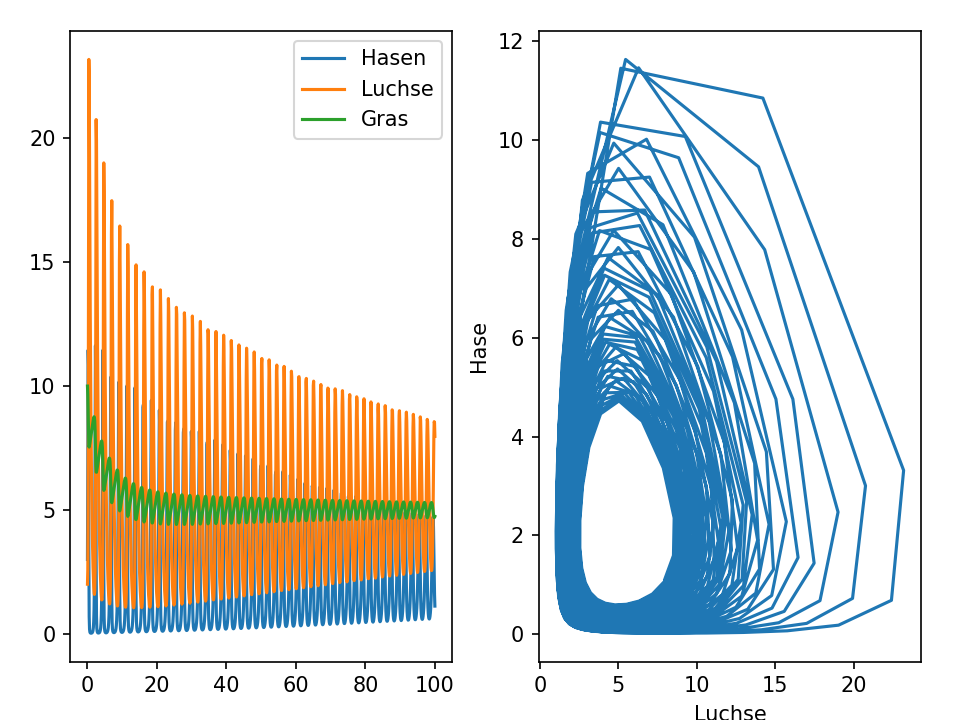

Text(313.26767676767673, 0.5, 'Hase')

In [65]:
%matplotlib notebook
fig, ax = plt.subplots(1,2)
fig.tight_layout()
#
ax[0].plot(t_eval,x, label = "Hasen")
ax[0].plot(t_eval,y, label = "Luchse")
ax[0].plot(t_eval,z, label = "Gras")
ax[0].legend()
ax[1].plot(y,x)
ax[1].set_xlabel("Luchse")
ax[1].set_ylabel("Hase")


In [41]:
z.shape

(82,)

In [51]:
z

array([3.00000000e+00, 2.42879769e+00, 1.95422964e+00, ...,
       2.61540014e-11, 2.53791178e-11, 2.46271796e-11])